In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [348]:
moon = pd.read_table(
        "../Data/raw_moon_1yr.txt", 
        names=['Time', 'Solar', 'Lunar' , 'R.A.', 'DEC',  'dRA*cosD', 'd(DEC)',  'T-O-M', 'MN_Illu%'],
        delimiter=',',
        index_col=False,
        skiprows = 62,
        skipfooter = 81,
        engine='python'
)
moon['Hours'] = pd.to_datetime(moon['Time']).astype(int) / 3600 / 10**9 - \
                pd.to_datetime(['2018-01-01 00:00']).astype(int) / 3600 /10**9

In [349]:
moon.head()

,Time,Solar,Lunar,R.A.,DEC,dRA*cosD,d(DEC),T-O-M,MN_Illu%,Hours
0,2018-Jan-01 00:00,*,,83.62762,18.52237,2768.085,53.22001,0.0,97.8279,0.0
1,2018-Jan-01 01:00,*,,84.45598,18.54308,2881.503,86.84145,0.0,98.0045,1.0
2,2018-Jan-01 02:00,*,,85.31246,18.57424,2958.407,127.73040,0.0,98.1801,2.0
3,2018-Jan-01 03:00,*,,86.18577,18.61748,2994.748,173.03270,0.0,98.3514,3.0
4,2018-Jan-01 04:00,*,,87.06376,18.67358,2988.681,219.70990,0.0,98.5158,4.0


Text(0.5, 1.0, 'MN_Illu% in two months')

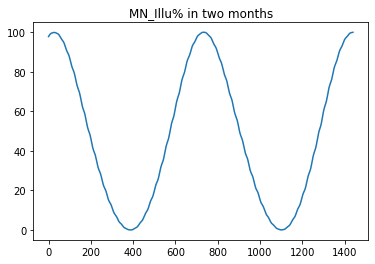

In [350]:
plt.plot(moon[:1440]['Hours'], moon[:1440]['MN_Illu%'])
plt.title("MN_Illu% in two months")

Text(0.5, 1.0, 'dRA in two months')

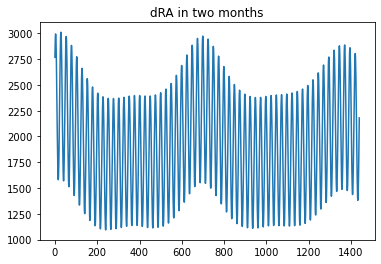

In [351]:
plt.plot(moon[:1440]['Hours'], moon[:1440]['dRA*cosD'])
plt.title("dRA in two months")

Text(0.5, 1.0, 'd(DEC) in two months')

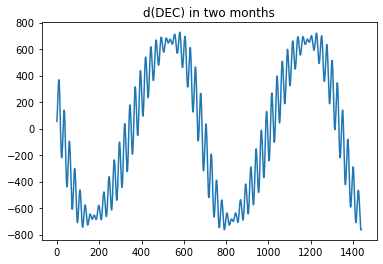

In [352]:
plt.plot(moon[:1440]['Hours'], moon[:1440]['d(DEC)'])
plt.title("d(DEC) in two months")

Text(0.5, 1.0, 'RA in two months')

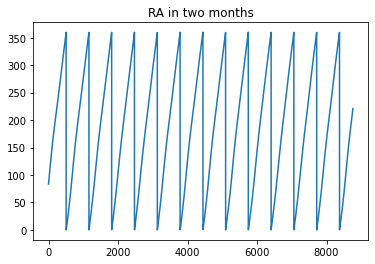

In [353]:
plt.plot(moon['Hours'], moon['R.A.'])
plt.title("RA in two months")

Text(0.5, 1.0, 'DEC in two months')

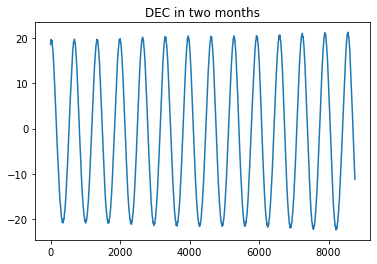

In [354]:
plt.plot(moon['Hours'], moon['DEC'])
plt.title("DEC in two months")

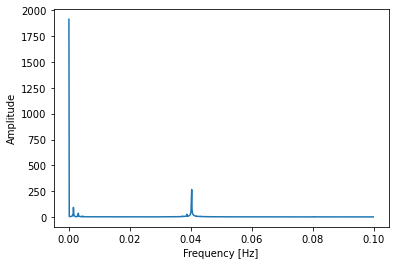

In [355]:
s = moon['dRA*cosD']
fft = np.fft.fft(s)/len(s)
samplingFrequency = 8760
tpCount     = len(s)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod
T = 1  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N // 10], np.abs(fft)[:N // 10])  # 1 / N is a normalization factor
plt.show()

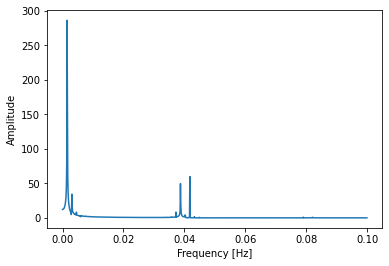

In [356]:
s = moon['d(DEC)']
fft = np.fft.fft(s)
T = 1  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(f[:N // 10], np.abs(fft)[:N // 10]*1 / N)  # 1 / N is a normalization factor
plt.show()